**Zadanie domowe - dzień 1**

Wejdź na stronę Głównego Urzędu Statystycznego - Bank Danych Lokalnych i znajdź interesujący ciebie zbiór danych który ma więcej niż 100 rekordów. Pobierz dane w formacie XLS i wczytaj je przy pomocy pakietu pandas (czasami będziesz zmuszony doinstalować paczkę openpyxl). W trakcie wczytywania danych możesz napotkać różne problemy, wypisz je w formie notatek, nawet jeśli później je rozwiążesz.
Po wczytaniu danych:

Sprawdź informacje o danych i opisz je przy pomocy metod info() oraz describe().
Sprawdź czy w zbiorze występują brakujące dane, jeśli tak, to usuń rekordy z nimi.
Sprawdź, czy w zbiorze występują duplikaty. Jeśli tak, to je usuń.
Wyświetl wybrany wiersz albo grupę wierszy z ramki danych (metoda nie ma znaczenia).
Przesortuj dane względem wybranej kolumny, wyświetl 5 pierwszych wierszy i 5 ostatnich wierszy (w dwóch oddzielnych komórkach).
Stwórz wykres dla wybranej kolumny (kolumn), nie ma znaczenia jaki to będzie wykres.
Stwórz bazę danych sqlite3 i tabelę do której zapiszesz dane.
Zapisz dane do stworzonej tabeli.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
XLSX_FILE = '/content/drive/MyDrive/DataScience/data/Zatrudnieni_wg_sekcji_sektorówwlasnosci_plci.xlsx'

In [ ]:
# odpowiedni sheet name
df = pd.read_excel(XLSX_FILE, sheet_name=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kod                 2754 non-null   int64 
 1   Nazwa               2754 non-null   object
 2   Sektory własności   2754 non-null   object
 3   Płeć                2754 non-null   object
 4   Sekcje wg PKD 2007  2754 non-null   object
 5   Rok                 2754 non-null   int64 
 6   Wartosc             2754 non-null   int64 
 7   Jednostka miary     2754 non-null   object
 8   Atrybut             2754 non-null   object
dtypes: int64(3), object(6)
memory usage: 193.8+ KB


In [ ]:
df.describe()

,Kod,Rok,Wartosc
count,2.754000e+03,2754.0,2.754000e+03
mean,1.600000e+06,2021.0,7.561079e+04
std,9.799738e+05,0.0,3.966767e+05
min,0.000000e+00,2021.0,0.000000e+00
25%,8.000000e+05,2021.0,1.461500e+03
50%,1.600000e+06,2021.0,7.260500e+03
75%,2.400000e+06,2021.0,3.536875e+04
max,3.200000e+06,2021.0,1.171302e+07


In [ ]:
df.isnull()

In [ ]:
len(df)

2754

In [ ]:
df.nunique()

Kod                     17
Nazwa                   17
Sektory własności        3
Płeć                     3
Sekcje wg PKD 2007      18
Rok                      1
Wartosc               2427
Jednostka miary          1
Atrybut                  2
dtype: int64

In [ ]:
df.drop(['Jednostka miary', 'Atrybut'], axis=1, inplace=True)

In [ ]:
# bez duplikatów?
len(df.drop_duplicates()) == len(df)

True

In [ ]:
df.sample(5)

,Kod,Nazwa,Sektory własności,Płeć,Sekcje wg PKD 2007,Rok,Wartosc
2711,3200000,ZACHODNIOPOMORSKIE,sektor prywatny,ogółem,Sekcja M,2021,9613
34,0,POLSKA,ogółem,mężczyźni,Sekcja R,2021,51937
1714,2000000,PODLASKIE,sektor publiczny,kobiety,Sekcja F,2021,0
2400,2800000,WARMIŃSKO-MAZURSKIE,sektor prywatny,mężczyźni,Sekcja H,2021,7865
843,1000000,ŁÓDZKIE,ogółem,mężczyźni,Sekcja Q,2021,8586


In [34]:
df_poland = df.query("Nazwa == 'POLSKA'")

In [ ]:
df_poland

In [36]:
DICTIONARY = '/content/drive/MyDrive/DataScience/data/slownik_sekcji.xlsx'

In [37]:
df_dict = pd.read_excel(DICTIONARY, sheet_name=0)

In [38]:
df_dict.head(2)

,Sekcje wg PKD 2007,Sekcje opis
0,Sekcja A,"Rolnictwo, leśnictwo, łowiectwo i rybactwo"
1,Sekcja: B+C+D+E,Przemysł


In [39]:
# dołączam słownik dla sekcji

df_full = df_poland.merge(df_dict, how='left', left_on='Sekcje wg PKD 2007', right_on='Sekcje wg PKD 2007')

In [40]:
df_full.head()

,Kod,Nazwa,Sektory własności,Płeć,Sekcje wg PKD 2007,Rok,Wartosc,Sekcje opis
0,0,POLSKA,ogółem,ogółem,ogółem,2021,11713020,NaN
1,0,POLSKA,ogółem,ogółem,Sekcja A,2021,169771,"Rolnictwo, leśnictwo, łowiectwo i rybactwo"
2,0,POLSKA,ogółem,ogółem,Sekcja: B+C+D+E,2021,3059408,Przemysł
3,0,POLSKA,ogółem,ogółem,Sekcja C,2021,2649886,Przetwórstwo przemysłowe.
4,0,POLSKA,ogółem,ogółem,Sekcja F,2021,728324,Budownictwo


In [ ]:
df_full.info()

In [44]:
# nie chcę widzieć wierszy, gdzie są dane dla 'ogółem'

sektory_condition = df_full['Sektory własności'] != 'ogółem'
plec_condition = df_full['Płeć'] != 'ogółem'
sekcje_condition = df_full['Sekcje wg PKD 2007'] != 'ogółem'

In [45]:
df_filtered = df_full[sektory_condition & plec_condition & sekcje_condition]

In [ ]:
df_filtered.head()

In [51]:
df_fin = df_filtered.reset_index()

In [ ]:
df_fin.head()

In [53]:
df_fin.drop(['index', 'Kod'], axis=1, inplace=True)

In [56]:
df_fin.head()

,Nazwa,Sektory własności,Płeć,Sekcje wg PKD 2007,Rok,Wartosc,Sekcje opis
0,POLSKA,sektor publiczny,mężczyźni,Sekcja A,2021,21460,"Rolnictwo, leśnictwo, łowiectwo i rybactwo"
1,POLSKA,sektor publiczny,mężczyźni,Sekcja: B+C+D+E,2021,222060,Przemysł
2,POLSKA,sektor publiczny,mężczyźni,Sekcja C,2021,36082,Przetwórstwo przemysłowe.
3,POLSKA,sektor publiczny,mężczyźni,Sekcja F,2021,8558,Budownictwo
4,POLSKA,sektor publiczny,mężczyźni,Sekcja G,2021,1744,Handel hurtowy i detaliczny; naprawa pojazdów ...


In [62]:
# sortowanie po kolumnie
df_sort = df_fin.sort_values(by=['Wartosc'], ascending=False)

In [63]:
# 5 pierwszych
df_sort.head()

,Nazwa,Sektory własności,Płeć,Sekcje wg PKD 2007,Rok,Wartosc,Sekcje opis
35,POLSKA,sektor prywatny,mężczyźni,Sekcja: B+C+D+E,2021,1833747,Przemysł
36,POLSKA,sektor prywatny,mężczyźni,Sekcja C,2021,1687599,Przetwórstwo przemysłowe.
55,POLSKA,sektor prywatny,kobiety,Sekcja G,2021,1042525,Handel hurtowy i detaliczny; naprawa pojazdów ...
52,POLSKA,sektor prywatny,kobiety,Sekcja: B+C+D+E,2021,945525,Przemysł
53,POLSKA,sektor prywatny,kobiety,Sekcja C,2021,914260,Przetwórstwo przemysłowe.


In [64]:
#5 ostatnich
df_sort.tail()

,Nazwa,Sektory własności,Płeć,Sekcje wg PKD 2007,Rok,Wartosc,Sekcje opis
16,POLSKA,sektor publiczny,mężczyźni,Sekcja S,2021,1466,Pozostała działalność usługowa
33,POLSKA,sektor publiczny,kobiety,Sekcja S,2021,1405,Pozostała działalność usługowa
21,POLSKA,sektor publiczny,kobiety,Sekcja G,2021,1100,Handel hurtowy i detaliczny; naprawa pojazdów ...
46,POLSKA,sektor prywatny,mężczyźni,Sekcja O,2021,413,Administracja publiczna i obrona narodowa; obo...
63,POLSKA,sektor prywatny,kobiety,Sekcja O,2021,61,Administracja publiczna i obrona narodowa; obo...


In [ ]:
df_sort.info()

In [73]:
# zmieniam typy danych object

df_convert = df_sort.convert_dtypes()

In [ ]:
df_convert.info()

In [101]:
year = str(df_convert['Rok'].iloc[0])
year

'2021'

In [113]:
import matplotlib.pyplot as plt

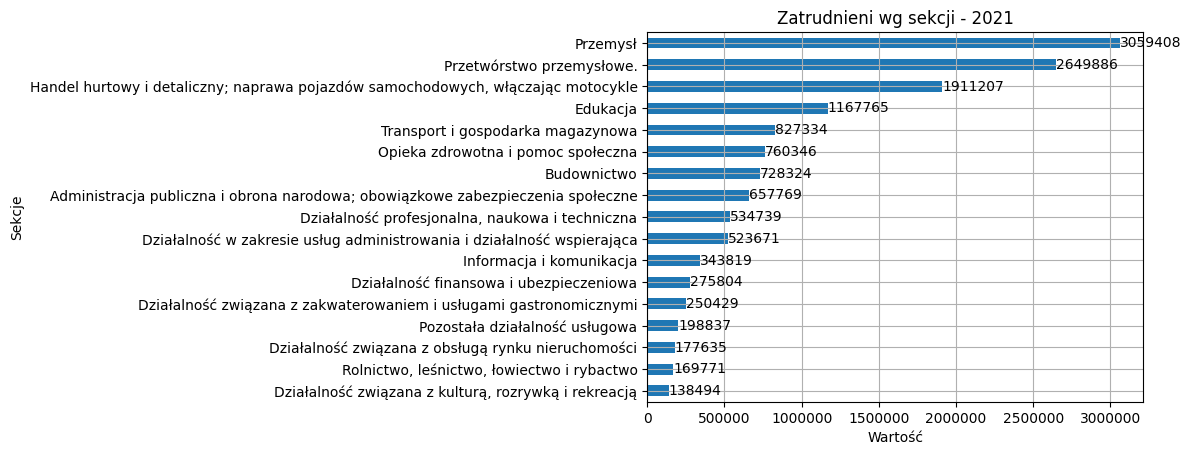

In [124]:
# grupowanie i suma wartości dla każdej sekcji
grouped_data = df_convert.groupby('Sekcje opis').sum(numeric_only=True)['Wartosc']

# sortowanie wartości i utworzenie wykresu
chart = grouped_data.sort_values().plot(kind='barh', title='Zatrudnieni wg sekcji - ' + year, xlabel='Wartość', ylabel='Sekcje', grid=True)

# zmiana formatu etykiet osi x na pełne wartości
chart.ticklabel_format(axis='x', style='plain')

# etykiety na słupkach
for index, value in enumerate(grouped_data.sort_values()):
    chart.text(value, index, f'{value:.0f}', ha='left', va='center')

plt.show()

In [126]:
import sqlite3

In [133]:
# tworzenie db
db = sqlite3.connect('zatrudnieni.db')

In [135]:
# tworzenie tabeli
df_convert.to_sql('zatrudnieni_sekcje_pl', db, index=True, if_exists='replace')
query = 'SELECT * FROM zatrudnieni_sekcje_pl'
df_from_db = pd.read_sql_query(query, db)

df_from_db

,index,Nazwa,Sektory własności,Płeć,Sekcje wg PKD 2007,Rok,Wartosc,Sekcje opis
0,35,POLSKA,sektor prywatny,mężczyźni,Sekcja: B+C+D+E,2021,1833747,Przemysł
1,36,POLSKA,sektor prywatny,mężczyźni,Sekcja C,2021,1687599,Przetwórstwo przemysłowe.
2,55,POLSKA,sektor prywatny,kobiety,Sekcja G,2021,1042525,Handel hurtowy i detaliczny; naprawa pojazdów ...
3,52,POLSKA,sektor prywatny,kobiety,Sekcja: B+C+D+E,2021,945525,Przemysł
4,53,POLSKA,sektor prywatny,kobiety,Sekcja C,2021,914260,Przetwórstwo przemysłowe.
...,...,...,...,...,...,...,...,...
63,16,POLSKA,sektor publiczny,mężczyźni,Sekcja S,2021,1466,Pozostała działalność usługowa
64,33,POLSKA,sektor publiczny,kobiety,Sekcja S,2021,1405,Pozostała działalność usługowa
65,21,POLSKA,sektor publiczny,kobiety,Sekcja G,2021,1100,Handel hurtowy i detaliczny; naprawa pojazdów ...
66,46,POLSKA,sektor prywatny,mężczyźni,Sekcja O,2021,413,Administracja publiczna i obrona narodowa; obo...


In [136]:
db.close()

**END**